In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('future.no_silent_downcasting', True)


### Data Dictionary: CRM and E-commerce Platform Customer Datasets

The following data dictionary outlines the shared structure of customer datasets across the CRM and E-commerce platforms:

| Column       | Definition                                |
|--------------|-------------------------------------------|
| `customer`   | The unique identifier for the customer.   |
| `first_name` | The customer's first name.                |
| `surname`    | The customer's last name.                 |
| `postcode`   | The customer's postal code.               |
| `age`        | The customer's age in years.              |


In [3]:
#customer data from Customer Relationship Management system
data_from_crm=pd.read_csv('../data/crm_export.csv') 
print(data_from_crm.shape)
data_from_crm.head()

(7825, 5)


,customer_id,first_name,surname,postcode,age
0,29223,Holly,Rogers,LS475RT,12
1,27826,Daniel,Owen,M902XX,5
2,7432,Eleanor,Russell,HR904ZA,34
3,2569,Paige,Roberts,DE732EP,61
4,9195,Matilda,Young,LS670FU,78


In [4]:
print(data_from_crm.info())
print(data_from_crm['age'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7825 entries, 0 to 7824
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  7825 non-null   int64 
 1   first_name   7825 non-null   object
 2   surname      7825 non-null   object
 3   postcode     7825 non-null   object
 4   age          7825 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 305.8+ KB
None
count    7825.000000
mean       40.009968
std        24.893072
min         0.000000
25%        21.000000
50%        38.000000
75%        56.000000
max       100.000000
Name: age, dtype: float64


In [5]:
data_from_crm[data_from_crm['age']==0].count()

customer_id    117
first_name     117
surname        117
postcode       117
age            117
dtype: int64

### Interpretation:

- The dataset contains **7,825 customers**.
- The average customer age is approximately **40 years**, indicating a broad customer base across various age groups.
- The standard deviation of approximately **25 years** suggests significant variability, meaning customer ages vary widely across the dataset.
- Customer ages range from **0 to 100 years**, covering a complete span of possible ages.
- The median age of **38 years** indicates that half of the customers are below this age, pointing towards a moderately younger customer segment.
- The interquartile range (**21–56 years**) shows that 50% of customers fall within this age bracket, emphasizing a diverse age distribution.

### Data Quality Note:

- There are **117 customer records** where the age is recorded as **0**. It is highly likely these represent incorrectly filled or missing age data rather than genuine ages.  
- **Recommendation:** Consider these records as missing or incorrect data entries, and perform further data validation or imputation before any detailed analysis or modeling.


In [6]:
#customer data from ecommerance platform
data_from_ecommerance_platform=pd.read_csv('../data/customer_database.csv') 
print(data_from_ecommerance_platform.shape)
print(data_from_ecommerance_platform.info())
data_from_ecommerance_platform.head()

(23476, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23476 entries, 0 to 23475
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  23476 non-null  int64 
 1   first_name   23476 non-null  object
 2   surname      23476 non-null  object
 3   postcode     23476 non-null  object
 4   age          23476 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 917.2+ KB
None


,customer_id,first_name,surname,postcode,age
0,1641,Rhys,Richards,DE456EZ,45
1,24796,Maisie,Young,SW433XX,16
2,14358,Nathan,King,NW49TU,58
3,15306,Jack,Moore,NW908RR,26
4,24971,Alexander,Roberts,SW500HW,85


In [7]:
print(data_from_ecommerance_platform.describe())
print(data_from_ecommerance_platform[data_from_ecommerance_platform['age']==0].count())

        customer_id           age
count  23476.000000  23476.000000
mean   17195.245826     39.858281
std     9734.124201     24.814917
min        1.000000      0.000000
25%     8729.750000     21.000000
50%    17370.500000     38.000000
75%    25960.500000     56.000000
max    33281.000000    101.000000
customer_id    331
first_name     331
surname        331
postcode       331
age            331
dtype: int64


In [8]:
for col in ['first_name', 'surname']:
    data_from_ecommerance_platform[col] = data_from_ecommerance_platform[col].str.lower().str.strip()
data_from_ecommerance_platform['postcode']=data_from_ecommerance_platform['postcode'].str.strip()

In [9]:
data_from_ecommerance_platform.groupby('customer_id').size().loc[lambda x: x > 1].count()


np.int64(0)

In [10]:
unique_ecommerance_customers = data_from_ecommerance_platform.drop(columns='customer_id').drop_duplicates()
print(unique_ecommerance_customers.shape)

(19889, 4)


### Interpretation:

- The dataset contains **23,476 customer records**.
- Among 23,476 customer ids, only **19,889 unique combinations of customer details.**
- Around **3,500 duplicates** to handle
- The average customer age is approximately **40 years**, indicating broad representation across age groups.
- A standard deviation of approximately **25 years** shows substantial age variation among customers.
- Customer ages range from **0 to 101 years**, indicating complete coverage of possible customer age groups.
- The median age (**38 years**) indicates a younger-to-middle-aged customer base, with half of the customers younger and half older.
- The interquartile range (**21–56 years**) demonstrates that half of the customers fall within this age interval, signifying a wide and diverse age distribution.

### Data Quality Note:

- **331 customer records** have an age recorded as **0**, indicating potential inaccuracies or missing age information.
- It is recommended to investigate or exclude these records from age-related analyses to ensure data accuracy.

This analysis helps underscore the necessity for careful data cleaning prior to further analytics or modeling.


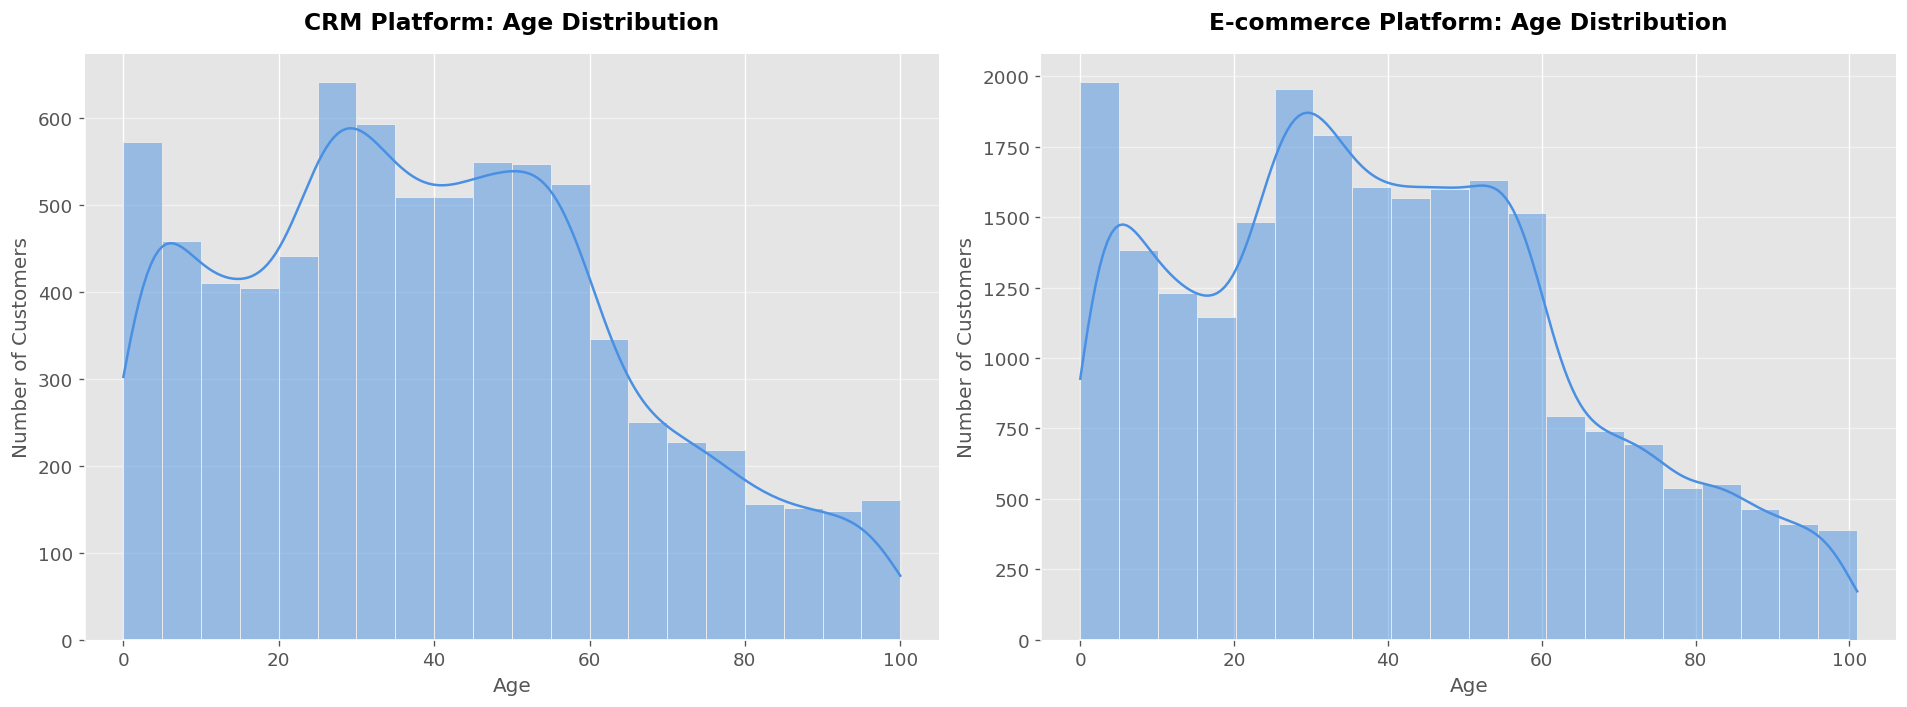

In [11]:
# Apply a modernized plotting style
plt.style.use('ggplot')

# Set figure size and resolution
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Plot for CRM data
sns.histplot(data_from_crm['age'], bins=20, kde=True, color='#4a90e2', ax=axes[0])
axes[0].set_title('CRM Platform: Age Distribution', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].tick_params(axis='both', labelsize=11)
axes[0].grid(axis='y', alpha=0.4)

# Plot for E-commerce data
sns.histplot(data_from_ecommerance_platform['age'], bins=20, kde=True, color='#4a90e2', ax=axes[1])
axes[1].set_title('E-commerce Platform: Age Distribution', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)

# Adjust ticks and layout
for ax in axes:
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(axis='y', alpha=0.5)

sns.despine(trim=True)
plt.tight_layout()
plt.show()


In [12]:
raw_trasaction_data=pd.read_csv('../data/purchases.csv')
print(raw_trasaction_data.shape)
raw_trasaction_data.head()

(71519, 11)


,event_time,product_id,category_id,category_code,brand,price,session_id,customer_id,guest_first_name,guest_surname,guest_postcode
0,2022-10-01 02:26:08+00:00,32701106,2055156924466332447,NaN,shimano,95.21,64c68405-7002-4ce0-9604-a4c2e1f7384b,NaN,MICHAEL,MASON,RG497ZQ
1,2022-10-01 02:28:32+00:00,9400066,2053013566067311601,NaN,jaguar,164.20,3b7d6741-3c82-4c75-8015-6f54b52612e0,7466.0,NaN,NaN,NaN
2,2022-10-01 02:31:01+00:00,1004238,2053013555631882655,electronics.smartphone,apple,1206.40,38c6d3f7-6c32-4fed-bca6-ef98e1746386,NaN,COLE,WILKINSON,SW75TQ
3,2022-10-01 02:33:31+00:00,11300059,2053013555531219353,electronics.telephone,texet,17.48,3398c966-7846-4186-89be-323daad735b9,NaN,MOHAMMED,RICHARDS,RG150RE
4,2022-10-01 02:40:18+00:00,17300751,2053013553853497655,NaN,versace,77.22,11e3a573-01b9-4794-b513-e7d8a4fcac83,31266.0,NaN,NaN,NaN


In [13]:
# Check for missing values in purchase data
raw_trasaction_data.isnull().sum()

event_time              0
product_id              0
category_id             0
category_code       16739
brand                5707
price                   0
session_id              0
customer_id         18448
guest_first_name    53071
guest_surname       53071
guest_postcode      53071
dtype: int64

There are 18,448 missing customer IDs, which should relate to guest checkouts, and 53,071 missing guest values. Adding those up gives us 71,519, which is the total number of records, meaning that guest checkouts and registered user checkouts make up our entire dataset. There are seemingly no rows with either all this information missing
or both being present, but we should verify this. First, let’s create a new column to track guest checkouts, which happen when a customer ID is not provided:

In [14]:
raw_trasaction_data['is_guest']=raw_trasaction_data['customer_id'].isnull()
raw_trasaction_data.head()

,event_time,product_id,category_id,category_code,brand,price,session_id,customer_id,guest_first_name,guest_surname,guest_postcode,is_guest
0,2022-10-01 02:26:08+00:00,32701106,2055156924466332447,NaN,shimano,95.21,64c68405-7002-4ce0-9604-a4c2e1f7384b,NaN,MICHAEL,MASON,RG497ZQ,True
1,2022-10-01 02:28:32+00:00,9400066,2053013566067311601,NaN,jaguar,164.20,3b7d6741-3c82-4c75-8015-6f54b52612e0,7466.0,NaN,NaN,NaN,False
2,2022-10-01 02:31:01+00:00,1004238,2053013555631882655,electronics.smartphone,apple,1206.40,38c6d3f7-6c32-4fed-bca6-ef98e1746386,NaN,COLE,WILKINSON,SW75TQ,True
3,2022-10-01 02:33:31+00:00,11300059,2053013555531219353,electronics.telephone,texet,17.48,3398c966-7846-4186-89be-323daad735b9,NaN,MOHAMMED,RICHARDS,RG150RE,True
4,2022-10-01 02:40:18+00:00,17300751,2053013553853497655,NaN,versace,77.22,11e3a573-01b9-4794-b513-e7d8a4fcac83,31266.0,NaN,NaN,NaN,False


***To check whether guest and registered user checkouts overlap***

In [15]:
raw_trasaction_data[raw_trasaction_data['is_guest']&raw_trasaction_data['customer_id'].notnull()]


,event_time,product_id,category_id,category_code,brand,price,session_id,customer_id,guest_first_name,guest_surname,guest_postcode,is_guest


In [16]:
raw_trasaction_data[(raw_trasaction_data['is_guest']==False)&(raw_trasaction_data['customer_id'].isnull())]

,event_time,product_id,category_id,category_code,brand,price,session_id,customer_id,guest_first_name,guest_surname,guest_postcode,is_guest


***Checking what percentage of records are guest checkouts to get a sense of how many customer records we will have to infer***

In [17]:
raw_trasaction_data['is_guest'].value_counts(normalize=True)

is_guest
False    0.742055
True     0.257945
Name: proportion, dtype: float64

This tells us that 25% of the rows are guest checkouts, but **one row represents a purchased item**, ***not a customer record***, so the proportion of customers who checked out as guests is not necessarily 25%. To calculate this actual proportion

In [18]:
guest_column=['guest_first_name', 'guest_surname','guest_postcode']
unique_guests=raw_trasaction_data[guest_column].drop_duplicates()
print(len(unique_guests))

8301


In [19]:
unique_registered_customers=raw_trasaction_data['customer_id'].nunique()  
print(unique_registered_customers)

24961


In [20]:
total_customer=len(unique_guests)+unique_registered_customers-1
print(total_customer)

33261


### Unified Data Model Schema for Customer Data

To effectively combine and analyze data from multiple sources (purchases, customer database, and CRM), it is essential to design a data structure that accurately tracks the origin of each customer record.

Initially, considering adding a single column indicating the data source (e.g., "purchase," "customer database," or "CRM")looks good. However, this approach assumes that each record originates from only one source, potentially causing issues when a customer appears in multiple datasets.

To address possible duplication clearly and efficiently, it is recommended to use **indicator columns** for each data source. These columns explicitly show whether each customer record exists within a specific dataset. Additionally, tracking guest checkouts separately is crucial because stakeholders may later inquire about metrics such as: **"What percentage of customers don’t register when purchasing?"**

##### Recommended Data Model Schema:

All customer data sources should be transformed into the following unified schema:

| Column             | Description                                                            |
|--------------------|------------------------------------------------------------------------|
| `customer_id`      | Unique identifier of the customer; set as `NULL` for guest checkouts.  |
| `first_name`       | Customer’s first name from CRM, customer database, or guest checkout.  |
| `surname`          | Customer’s surname from CRM, customer database, or guest checkout.     |
| `postcode`         | Postal code from CRM, customer database, or guest checkout.            |
| `age`              | Customer's age from CRM or customer database; unavailable for guests.  |
| `is_guest`         | `True` if the record originates from a guest checkout.                 |
| `in_purchase_data` | `True` if the customer record appears in purchase transactions. (Not exclusive; a customer may also appear in other datasets.) |
| `in_crm_data`      | `True` if the customer record is present in the CRM database.          |
| `in_customer_data` | `True` if the customer record exists in the customer database.         |

This schema provides clarity on customer record sources and supports comprehensive analysis and reporting.


In [21]:
guest_columns=['guest_first_name','guest_surname','guest_postcode','is_guest']
guests=raw_trasaction_data.loc[raw_trasaction_data['is_guest'],guest_columns]
guests.drop_duplicates(inplace=True)
print(guests.head())
print(guests.shape)

   guest_first_name guest_surname guest_postcode  is_guest
0           MICHAEL         MASON        RG497ZQ      True
2              COLE     WILKINSON         SW75TQ      True
3          MOHAMMED      RICHARDS        RG150RE      True
7              KIAN         MILLS        SW332TF      True
13             RUBY          OWEN        PO377YS      True
(8300, 4)


In [22]:
non_guests=raw_trasaction_data.loc[raw_trasaction_data['customer_id'].notnull(),'customer_id'].unique().astype(int) #Extracting unique customer IDs from the non-guests
non_guests=pd.DataFrame(non_guests,columns=['customer_id']) #Customer ID is a single column,so we need to explicitly make it a DataFrame.
print(non_guests.shape)
non_guests.head()

(24961, 1)


,customer_id
0,7466
1,31266
2,534142828
3,1035
4,6985


In [23]:
purchased_customers=pd.concat([non_guests,guests],axis=0,ignore_index=True)
print(purchased_customers.shape)
purchased_customers.tail()

(33261, 5)


,customer_id,guest_first_name,guest_surname,guest_postcode,is_guest
33256,NaN,POPPY,FOSTER,M192EQ,True
33257,NaN,SOPHIE,CHAPMAN,NW500AS,True
33258,NaN,SCARLETT,SHAW,EX86QS,True
33259,NaN,MICHAEL,HARRISON,HR280TG,True
33260,NaN,SKYE,GREEN,HR478ER,True


In [24]:
purchased_customers['is_guest']=purchased_customers['is_guest'].fillna(False)
purchased_customers.tail()

,customer_id,guest_first_name,guest_surname,guest_postcode,is_guest
33256,NaN,POPPY,FOSTER,M192EQ,True
33257,NaN,SOPHIE,CHAPMAN,NW500AS,True
33258,NaN,SCARLETT,SHAW,EX86QS,True
33259,NaN,MICHAEL,HARRISON,HR280TG,True
33260,NaN,SKYE,GREEN,HR478ER,True


In [25]:
#change the column name to be consistent with the CRM data
new_column_name=['customer_id','first_name','surname','postcode','is_guest']
purchased_customers=purchased_customers.set_axis(new_column_name,axis=1)
purchased_customers.head()

,customer_id,first_name,surname,postcode,is_guest
0,7466.0,NaN,NaN,NaN,False
1,31266.0,NaN,NaN,NaN,False
2,534142828.0,NaN,NaN,NaN,False
3,1035.0,NaN,NaN,NaN,False
4,6985.0,NaN,NaN,NaN,False


In [26]:
purchased_customers['in_purchase_data']=True
purchased_customers.head()

,customer_id,first_name,surname,postcode,is_guest,in_purchase_data
0,7466.0,NaN,NaN,NaN,False,True
1,31266.0,NaN,NaN,NaN,False,True
2,534142828.0,NaN,NaN,NaN,False,True
3,1035.0,NaN,NaN,NaN,False,True
4,6985.0,NaN,NaN,NaN,False,True


In [27]:
for col in ['first_name','surname']:
    purchased_customers[col]=purchased_customers[col].str.lower().str.strip()
purchased_customers['postcode']=purchased_customers['postcode'].str.strip()
purchased_customers

,customer_id,first_name,surname,postcode,is_guest,in_purchase_data
0,7466.0,NaN,NaN,NaN,False,True
1,31266.0,NaN,NaN,NaN,False,True
2,534142828.0,NaN,NaN,NaN,False,True
3,1035.0,NaN,NaN,NaN,False,True
4,6985.0,NaN,NaN,NaN,False,True
...,...,...,...,...,...,...
33256,NaN,poppy,foster,M192EQ,True,True
33257,NaN,sophie,chapman,NW500AS,True,True
33258,NaN,scarlett,shaw,EX86QS,True,True
33259,NaN,michael,harrison,HR280TG,True,True


If we look at the purchased data, there are register customer with no names ,and missing customer id. So, we can check those whether they exit in crm and e-commerence data base or not.

In [28]:
data_from_crm.groupby('customer_id').size().loc[lambda x:x>1]

Series([], dtype: int64)

Here we use groupby and size to count how many records we have per customer ID and use loc to filter instances where there is more than one. The Python output is Series([], dtype: int64), which indicates no records were found, as the empty square brackets represent an empty collection in Python. This means **customer IDs are indeed unique.**

In [29]:
print(len(data_from_crm))
print(len(data_from_crm.drop(columns="customer_id").drop_duplicates()))

7825
7419


The output is 7,825 and 7,419, respectively, meaning that while there are 7,825 rows in the CRM data, there are only 7,419 unique combinations of columns once we drop the customer ID, which indicates we have about 400 duplicate customer details where the same information is spread across multiple IDs. This might not mean 400 duplicate customers because we could also have multiple people with very common names living at the same postcode, but because we have also factored age into it, it is more likely these are all redundant duplicates. Incorrect duplicates, if there are any, are ***likely to be a very small percentage*** when we consider the size of the dataset, so it makes sense not to dwell on this, and for now,

In [30]:
purchase_and_crm_data=purchased_customers.merge(data_from_crm,on='customer_id',how='left',suffixes=('_purchase','_crm'))
print(purchase_and_crm_data.shape)
purchase_and_crm_data.head()

(33261, 10)


,customer_id,first_name_purchase,surname_purchase,postcode_purchase,is_guest,in_purchase_data,first_name_crm,surname_crm,postcode_crm,age
0,7466.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
1,31266.0,NaN,NaN,NaN,False,True,Harley,Palmer,HR250EJ,33.0
2,534142828.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
3,1035.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
4,6985.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN


In [31]:
purchase_and_crm_data['in_crm_data']=purchase_and_crm_data['age'].notnull()
purchase_and_crm_data.head()

,customer_id,first_name_purchase,surname_purchase,postcode_purchase,is_guest,in_purchase_data,first_name_crm,surname_crm,postcode_crm,age,in_crm_data
0,7466.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,False
1,31266.0,NaN,NaN,NaN,False,True,Harley,Palmer,HR250EJ,33.0,True
2,534142828.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,False
3,1035.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,False
4,6985.0,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,False


In [32]:
# Create a boolean mask that selects rows where:
# - 'in_crm_data' is True, and
# - either 'first_name_purchase' or 'surname_purchase' or 'postal_code' is missing.
mask = (purchase_and_crm_data['in_crm_data'] == True) & (
    purchase_and_crm_data['first_name_purchase'].isna() | purchase_and_crm_data['surname_purchase'].isna() | purchase_and_crm_data['postcode_purchase'].isna()
)

# Update the 'first_name_purchase' and 'surname_purchase' columns for those rows
purchase_and_crm_data.loc[mask, 'first_name_purchase'] = purchase_and_crm_data.loc[mask, 'first_name_crm']
purchase_and_crm_data.loc[mask, 'surname_purchase'] = purchase_and_crm_data.loc[mask, 'surname_crm']

# Drop the 'first_name_crm', 'surname_crm', and 'postcode_crm' columns
purchase_and_crm_data.drop(columns=['first_name_crm', 'surname_crm', 'postcode_crm'], inplace=True)

In [33]:
purchase_and_crm_data['first_name_purchase']=purchase_and_crm_data['first_name_purchase'].str.lower().str.strip()
purchase_and_crm_data['surname_purchase']=purchase_and_crm_data['surname_purchase'].str.lower().str.strip()
purchase_and_crm_data['postcode_purchase']=purchase_and_crm_data['postcode_purchase'].str.strip()

In [34]:
purchase_and_crm_data.rename(columns={'first_name_purchase':'first_name',
                                      'surname_purchase':'surname',
                                      'postcode_purchase':'postcode'},inplace=True)
purchase_and_crm_data['in_crm_data'].value_counts()

in_crm_data
False    26147
True      7114
Name: count, dtype: int64

What remains is to check for and add customer details that exist in our CRM system but do not appear in our purchases.There may be reasons for this;
perhaps those customers bought something on the phone, and those sales do not get recorded in the same place. Whatever the reason, it is a possibility that we need to
account for to ensure full coverage.

In [35]:
crm_to_add=list(set(data_from_crm['customer_id'].unique())-set(purchase_and_crm_data['customer_id'].unique()))
len(crm_to_add)

711

In [36]:
purchase_and_crm_data=pd.concat([purchase_and_crm_data,data_from_crm[data_from_crm['customer_id'].isin(crm_to_add)]],axis=0,ignore_index=True)

purchase_and_crm_data['is_guest']=purchase_and_crm_data['is_guest'].fillna(False)

purchase_and_crm_data['in_purchase_data'] = purchase_and_crm_data['in_purchase_data'].fillna(False)

purchase_and_crm_data.loc[
    purchase_and_crm_data['customer_id'].isin(crm_to_add), 'in_crm_data'
] = True


purchase_and_crm_data['in_crm_data'].value_counts()

in_crm_data
False    26147
True      7825
Name: count, dtype: int64